 ## SkyInsight: ML Weather Forecasting System

SkyInsight is a powerful system designed to accurately classify weather conditions as Overcast, Clear, or Foggy. This classifier employs advanced techniques from machine learning domains to achieve precise weather predictions.


In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
import warnings
warnings.simplefilter('ignore')
sns.set_theme(style="dark")
from sklearn.cluster import KMeans

In [3]:
data1.count()

Formatted Date              96453
Summary                     96453
Precip Type                 95936
Temperature (C)             96453
Apparent Temperature (C)    96453
Humidity                    96453
Wind Speed (km/h)           96453
Wind Bearing (degrees)      96453
Visibility (km)             96453
Loud Cover                  96453
Pressure (millibars)        96453
Daily Summary               96453
dtype: int64

In [2]:
# Fetching data
data1 = pd.read_csv(r"C:\Users\Rushkesh\OneDrive\Desktop\Project\weatherHistory.csv")
data1.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [81]:
# Analyzing the Data types and Exploring the number of entities in a feature
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [82]:
# Checking Statistical Summary
data1.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


count: This column tells you the number of non-null values in each numerical column. It is important because missing data can affect your analysis.

mean: The mean (average) value of each column provides a measure of central tendency. In this coloum we see that the mean of all numerical data and it.

std: The standard deviation measures the dispersion or spread of data around the mean. A higher standard deviation suggests greater variability in the data. In this coloum we see the all data are deviation of the in our coloum.

min: This is the minimum value observed in each column. It gives you the lowest data point in the dataset. In this coloum we see the all data minimum value and it is as.

25%, 50%, and 75%: These values represent the quartiles of the data. The 25th percentile (Q1) is the value below which 25% of the data falls. The 50th percentile (Q2), also known as the median, is the value below which 50% of the data falls. The 75th percentile (Q3) is the value below which 75% of the data falls. These values help you understand the distribution of the data.

max: This is the maximum value observed in each column. It gives you the highest data point in the dataset. This coloum represent the maximum value of our data is coloum vise.

In [83]:
# Checking Target Variable
print(data1["Summary"].value_counts())

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [84]:
# Reduced Data (Using only 3 classes)
data = data1[(data1["Summary"] == "Overcast") | (data1["Summary"] == "Clear") | (data1["Summary"] == "Foggy")]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34635 entries, 46 to 96436
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            34635 non-null  object 
 1   Summary                   34635 non-null  object 
 2   Precip Type               34396 non-null  object 
 3   Temperature (C)           34635 non-null  float64
 4   Apparent Temperature (C)  34635 non-null  float64
 5   Humidity                  34635 non-null  float64
 6   Wind Speed (km/h)         34635 non-null  float64
 7   Wind Bearing (degrees)    34635 non-null  float64
 8   Visibility (km)           34635 non-null  float64
 9   Loud Cover                34635 non-null  float64
 10  Pressure (millibars)      34635 non-null  float64
 11  Daily Summary             34635 non-null  object 
dtypes: float64(8), object(4)
memory usage: 3.4+ MB


In [85]:
# Calculating Missing Values
missing_values_count = data.isnull().sum()
missing_values_count

Formatted Date                0
Summary                       0
Precip Type                 239
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [86]:
# Since 359 is a reasonable count. Dropping the respective rows. If the count were smaller we would've filled it up with dummy values
data.dropna(inplace=True) 
# Again checking for values
missing_values_count = data.isnull().sum()
missing_values_count

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [87]:
# Calculating number of duplicated values
print("Duplicated Values: ",data.duplicated().sum())

Duplicated Values:  17


In [88]:
# Removing duplicated values
data.drop_duplicates(inplace=True)
# Again checking for duplicated values
print("Duplicated Values: ", data.duplicated().sum())

Duplicated Values:  0


In [89]:
# Rounding up the float64 data upto 2 decimals.
float_cols = data.select_dtypes(include='float')
data[float_cols.columns] = float_cols.round(2)
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
46,2006-04-10 22:00:00.000 +0200,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,0.0,1007.85,Mostly cloudy throughout the day.
47,2006-04-10 23:00:00.000 +0200,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,0.0,1007.89,Mostly cloudy throughout the day.
48,2006-04-11 00:00:00.000 +0200,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,0.0,1007.36,Foggy in the evening.
49,2006-04-11 01:00:00.000 +0200,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,0.0,1007.26,Foggy in the evening.
50,2006-04-11 02:00:00.000 +0200,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,0.0,1005.10,Foggy in the evening.


In [90]:
# Formatting Date Column. This can be used to identify any seasonality and trends
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce')
# Extracting the relevant components
data["Time"] = [d.time() for d in data['Formatted Date']]
data["Time"] = data["Time"].astype(str)
data["Time"] = data["Time"].str.split(':').str[0].astype(int)
data["Date"] = [d.date() for d in data['Formatted Date']]
data["Date"]= data["Date"].astype(str)
data["Year"] = data["Date"].str.split('-').str[0].astype(int)
data["Month"] = data["Date"].str.split('-').str[1].astype(int)
data["Day"] = data["Date"].str.split('-').str[2].astype(int)
# Dropping the original column 
data = data.drop(columns=['Formatted Date','Date'], axis=1)

* #### Redundant Columns Treatment

In [91]:
# It can be seen that the feature "Loud Cover" have only value '0' and mean and other statistical overview also support the deduction. Hence, it is the redundant column
data["Loud Cover"].value_counts()

0.0    34379
Name: Loud Cover, dtype: int64

In [92]:
# Removing 'Loud Cover'
data.drop(columns=["Loud Cover"], axis=1, inplace=True)
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Time,Year,Month,Day
46,Overcast,rain,14.42,14.42,0.58,20.01,159.0,15.83,1007.85,Mostly cloudy throughout the day.,22,2006,4,10
47,Overcast,rain,14.26,14.26,0.59,16.50,168.0,14.96,1007.89,Mostly cloudy throughout the day.,23,2006,4,10
48,Overcast,rain,13.77,13.77,0.60,17.10,160.0,15.83,1007.36,Foggy in the evening.,0,2006,4,11
49,Overcast,rain,13.28,13.28,0.63,14.36,160.0,15.83,1007.26,Foggy in the evening.,1,2006,4,11
50,Overcast,rain,8.63,5.47,0.87,22.04,32.0,6.70,1005.10,Foggy in the evening.,2,2006,4,11


* #### Outlier Treatment

In [93]:
# Different types of columns
numeric_columns = list(data.select_dtypes(include=['float64', 'int64']).columns)
categorical_columns = list(data.select_dtypes(include=['object']).columns)
continuous_columns = [i for i in numeric_columns if len(list(data[i].unique()))>=25]
discrete_columns = [i for i in numeric_columns if len(list(data[i].unique()))<25]
print("Numerical Columns: ", numeric_columns)
print()
print("Categorical Columns: ", categorical_columns)
print()
print("Continuous Columns: ", continuous_columns)
print()
print("Discrete Columns: ", discrete_columns)

Numerical Columns:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

Categorical Columns:  ['Summary', 'Precip Type', 'Daily Summary']

Continuous Columns:  ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']

Discrete Columns:  []


<AxesSubplot:xlabel='Summary', ylabel='Temperature (C)'>

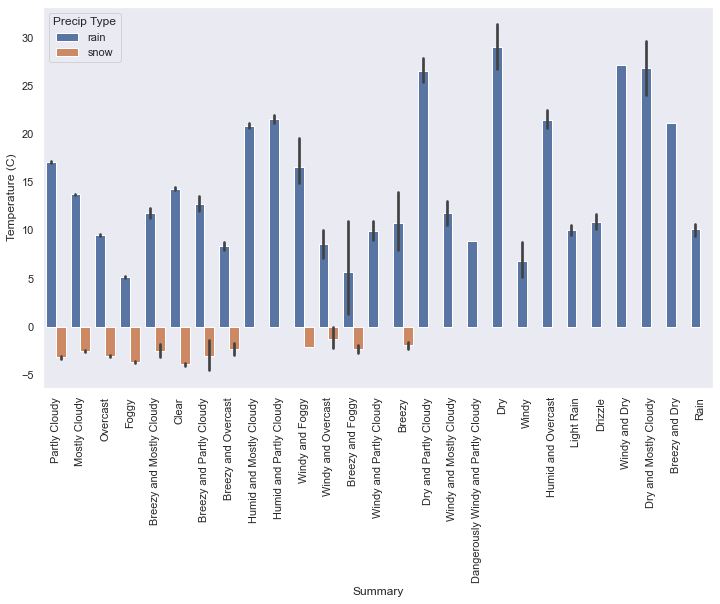

In [94]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=data1, x="Summary", y="Temperature (C)",hue="Precip Type")

In [95]:
data1[["Date-Time","TZ"]]=data1["Formatted Date"].str.split("+",expand=True)
df1=data1.drop(columns="Formatted Date")
df1.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date-Time,TZ
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00.000,0200
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00.000,0200
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00.000,0200
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00.000,0200
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00.000,0200


In [96]:
columns_order=["Date-Time","TZ","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)",
                "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover",
                "Pressure (millibars)", "Daily Summary"]
df2=df1.reindex(columns=columns_order)
df3=df2.drop(columns="TZ")
df3.head()

,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [97]:
df3["Date-Time"]=pd.to_datetime(df3["Date-Time"])
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date-Time                 96453 non-null  datetime64[ns]
 1   Summary                   96453 non-null  object        
 2   Precip Type               95936 non-null  object        
 3   Temperature (C)           96453 non-null  float64       
 4   Apparent Temperature (C)  96453 non-null  float64       
 5   Humidity                  96453 non-null  float64       
 6   Wind Speed (km/h)         96453 non-null  float64       
 7   Wind Bearing (degrees)    96453 non-null  float64       
 8   Visibility (km)           96453 non-null  float64       
 9   Loud Cover                96453 non-null  float64       
 10  Pressure (millibars)      96453 non-null  float64       
 11  Daily Summary             96453 non-null  object        
dtypes: datetime64[ns](

In [98]:
df3["Year"]=pd.DatetimeIndex(df3["Date-Time"]).year
df3["Month"]=df3["Date-Time"].dt.month_name()
df3["day"]=df3["Date-Time"].dt.day
df3.head()

,Date-Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,day
0,2006-04-01 00:00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,April,1
1,2006-04-01 01:00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,April,1
2,2006-04-01 02:00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,April,1
3,2006-04-01 03:00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,April,1
4,2006-04-01 04:00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,April,1


In [99]:
df3["Wind Speed (km/h)"].describe()

count    96453.000000
mean        10.810640
std          6.913571
min          0.000000
25%          5.828200
50%          9.965900
75%         14.135800
max         63.852600
Name: Wind Speed (km/h), dtype: float64

In this Data we see that the Average of the Wind Speed is nearly 11 Km/h.

The minimum wind speed 0 km/h and the maximum wind speed 63.85 Km/h

In [100]:
avg_wind_Speed=pd.DataFrame(df3.groupby("Year")["Wind Speed (km/h)"].mean())
avg_wind_Speed
#=["Year","AVG. Wind Speed (km/hr"]

,Wind Speed (km/h)
Year,
2006,10.189852
2007,10.825392
2008,11.303897
2009,11.505948
2010,11.015628
2011,9.898262
2012,11.264545
2013,10.969389
2014,10.502473


Also we see that the Average of the Wind Speed yearwise & the highest Wind speed yearwise is 11.50 km/h.

Text(0.5, 1.0, 'Average wind speed over the years')

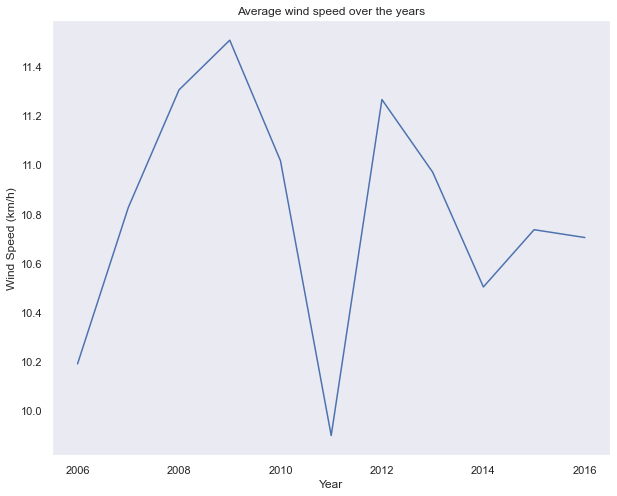

In [101]:
fig,ax=plt.subplots(figsize=(10,8))
sns.lineplot(x=avg_wind_Speed.index,y=avg_wind_Speed["Wind Speed (km/h)"])
plt.title("Average wind speed over the years")

In this lineplot we see the Average of the Wind Speed as compare to Year.

In [102]:
month_avg_wind_Speed=pd.DataFrame(df3.groupby("Month")["Wind Speed (km/h)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_wind_speed=month_avg_wind_Speed.reindex(index=order)
monthly_wind_speed

,Wind Speed (km/h)
Month,
January,11.512816
February,12.185543
March,13.405461
April,11.893094
May,10.959337
June,9.626471
July,9.639907
August,8.933431
September,9.621813


Text(0.5, 1.0, 'Monthly Average wind speed over the years')

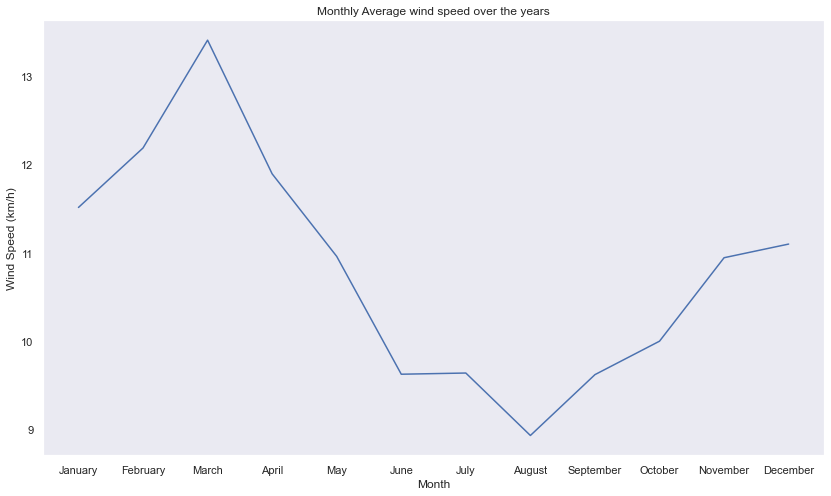

In [103]:
fig,ax=plt.subplots(figsize=(14,8))
sns.lineplot(x=monthly_wind_speed.index,y=monthly_wind_speed["Wind Speed (km/h)"])
plt.title("Monthly Average wind speed over the years")


In this line plot we see Monthly Average wind speed over the years

In [104]:
df3["Summary"].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [105]:
weather_cond=pd.DataFrame(df3.groupby("Year")["Summary"].describe(include="O").top)

weather_cond.rename(columns={"top":"most frequent weather"})

,most frequent weather
Year,
2006,Partly Cloudy
2007,Partly Cloudy
2008,Partly Cloudy
2009,Partly Cloudy
2010,Partly Cloudy
2011,Partly Cloudy
2012,Partly Cloudy
2013,Partly Cloudy
2014,Mostly Cloudy


In [106]:
m_weather_cond=pd.DataFrame(df3.groupby("Month")["Summary"].describe(include="O").top)
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
m_weather_cond.rename(columns={"top":"most frequent weather"})
monthly=m_weather_cond.reindex(index=order)
monthly

,top
Month,
January,Overcast
February,Overcast
March,Mostly Cloudy
April,Partly Cloudy
May,Partly Cloudy
June,Partly Cloudy
July,Partly Cloudy
August,Partly Cloudy
September,Partly Cloudy


In [107]:
month_avg_visibility=pd.DataFrame(df3.groupby("Month")["Visibility (km)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
monthly_visibility=month_avg_visibility.reindex(index=order)
monthly_visibility

,Visibility (km)
Month,
January,7.830584
February,8.731368
March,10.910450
April,11.784224
May,11.892754
June,11.990266
July,12.187820
August,12.455549
September,11.602874


Text(0.5, 1.0, 'Monthly visibility over the years')

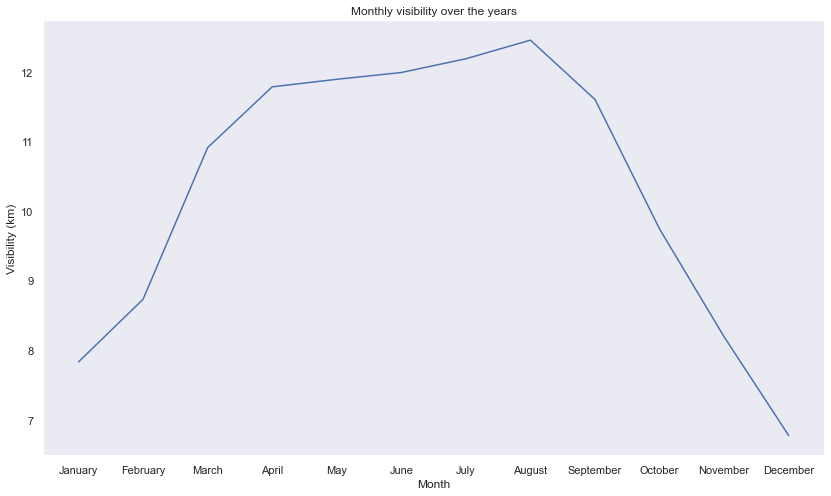

In [108]:
fig,ax=plt.subplots(figsize=(14,8))
sns.lineplot(x=monthly_visibility.index,y=monthly_visibility["Visibility (km)"])
plt.title("Monthly visibility over the years")

In this line plot we see Monthly visibility over the years

In [109]:
percip=pd.DataFrame(df3.groupby("Month")["Precip Type"].describe(include="O").top)
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]
m_p=percip.rename(columns={"top":"Precip Type"})
monthly_percip=m_p.reindex(index=order)
monthly_percip

,Precip Type
Month,
January,rain
February,rain
March,rain
April,rain
May,rain
June,rain
July,rain
August,rain
September,rain


Text(0, 0.5, 'freq')

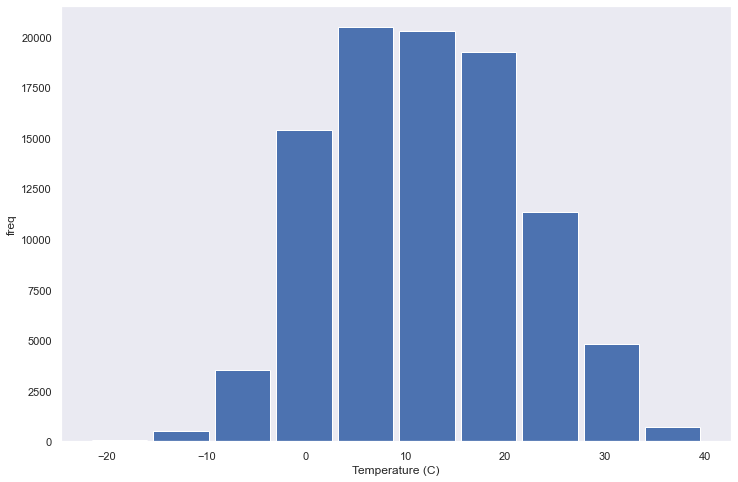

In [110]:
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(df3["Temperature (C)"],bins=10,rwidth=0.9)
plt.xlabel("Temperature (C)")
plt.ylabel("freq")

In this histogram we see the Temperature frequency is follow the normally distributed

In [111]:
year_avg_temp=pd.DataFrame(df3.groupby("Year")["Temperature (C)"].mean())
year_avg_temp

,Temperature (C)
Year,
2006,11.215365
2007,12.135239
2008,12.161876
2009,12.267910
2010,11.202061
2011,11.524453
2012,11.986726
2013,11.940719
2014,12.529737


Text(0.5, 1.0, 'Annual avg. temperature')

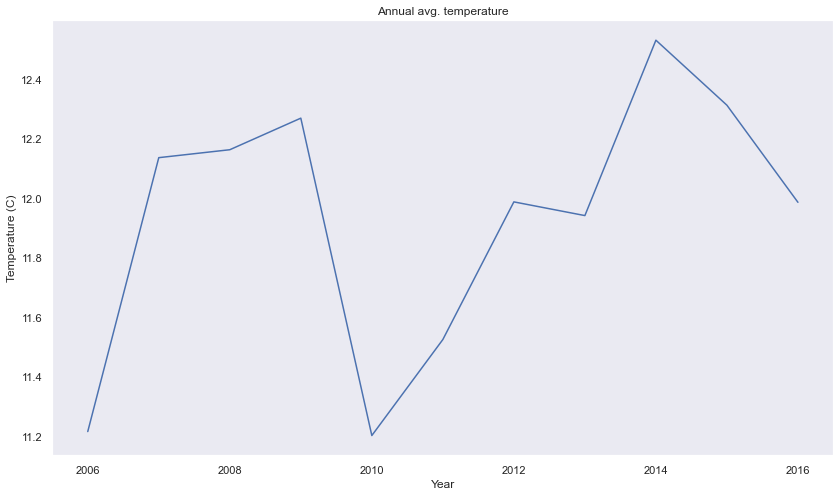

In [112]:
fig,ax=plt.subplots(figsize=(14,8))
sns.lineplot(x=year_avg_temp.index,y=year_avg_temp["Temperature (C)"])
plt.title("Annual avg. temperature")

In [113]:
month_temp=pd.DataFrame(df3.groupby("Month")["Temperature (C)"].mean())
order=["January","February","March","April","May","June","July","August","September",
            "October","November","December"]

monthly_avg_temp=month_temp.reindex(index=order)
monthly_avg_temp

,Temperature (C)
Month,
January,0.813890
February,2.159699
March,6.906599
April,12.756417
May,16.873692
June,20.715617
July,22.963943
August,22.345031
September,17.516790


Text(0.5, 1.0, 'monthly avg. temperature')

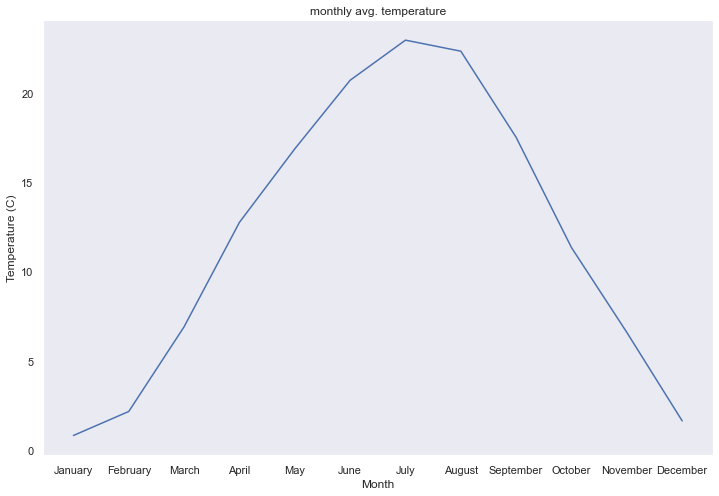

In [114]:
fig,ax=plt.subplots(figsize=(12,8))
sns.lineplot(x=monthly_avg_temp.index,y=monthly_avg_temp["Temperature (C)"])
plt.title("monthly avg. temperature")

* #### Classes Distribution

In [115]:
# Checking whether the target variable is balanced or unbalanced
counts = data["Summary"].value_counts()
total = counts.sum()
percentages = (counts / total) * 100
print(percentages)
print()
print("The classes are satifactory balanced")

Overcast    48.040955
Clear       31.257454
Foggy       20.701591
Name: Summary, dtype: float64

The classes are satifactory balanced


* #### Dataset Split

In [116]:
# Input features dataset
input_df = data.drop(columns="Summary", axis=1)
input_df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Time,Year,Month,Day
46,rain,14.42,14.42,0.58,20.01,159.0,15.83,1007.85,Mostly cloudy throughout the day.,22,2006,4,10
47,rain,14.26,14.26,0.59,16.50,168.0,14.96,1007.89,Mostly cloudy throughout the day.,23,2006,4,10
48,rain,13.77,13.77,0.60,17.10,160.0,15.83,1007.36,Foggy in the evening.,0,2006,4,11
49,rain,13.28,13.28,0.63,14.36,160.0,15.83,1007.26,Foggy in the evening.,1,2006,4,11
50,rain,8.63,5.47,0.87,22.04,32.0,6.70,1005.10,Foggy in the evening.,2,2006,4,11


In [117]:
# Target variable 
# Applying mapping
encoder = LabelEncoder()
y = data["Summary"]
y = encoder.fit_transform(y)

# Checking the mapping of the classes
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
for class_label, class_number in class_mapping.items():
    print(f"Class '{class_label}' is labeled as {class_number}")

Class 'Clear' is labeled as 0
Class 'Foggy' is labeled as 1
Class 'Overcast' is labeled as 2


* #### Categorical Features Encoding

In [118]:
# As "Precip Type" have only 2 values, hence applying binary encoding
mapping = {'rain': 0, 'snow': 1}
input_df['Precip Type'] = input_df['Precip Type'].map(mapping)

In [119]:
# As "Daily Summary" have 221 unique values, hence applying Frequency encoding
# Creating a new column for frequency encoding and removing previous column
input_df['Daily Summary Frequency'] = input_df['Daily Summary'].map(input_df['Daily Summary'].value_counts(normalize=True))
input_df.drop(columns=['Daily Summary'], axis=1, inplace=True)
# Checking data
input_df.head()

,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Time,Year,Month,Day,Daily Summary Frequency
46,0,14.42,14.42,0.58,20.01,159.0,15.83,1007.85,22,2006,4,10,0.168068
47,0,14.26,14.26,0.59,16.50,168.0,14.96,1007.89,23,2006,4,10,0.168068
48,0,13.77,13.77,0.60,17.10,160.0,15.83,1007.36,0,2006,4,11,0.004247
49,0,13.28,13.28,0.63,14.36,160.0,15.83,1007.26,1,2006,4,11,0.004247
50,0,8.63,5.47,0.87,22.04,32.0,6.70,1005.10,2,2006,4,11,0.004247


* #### Checking Multicollinearity

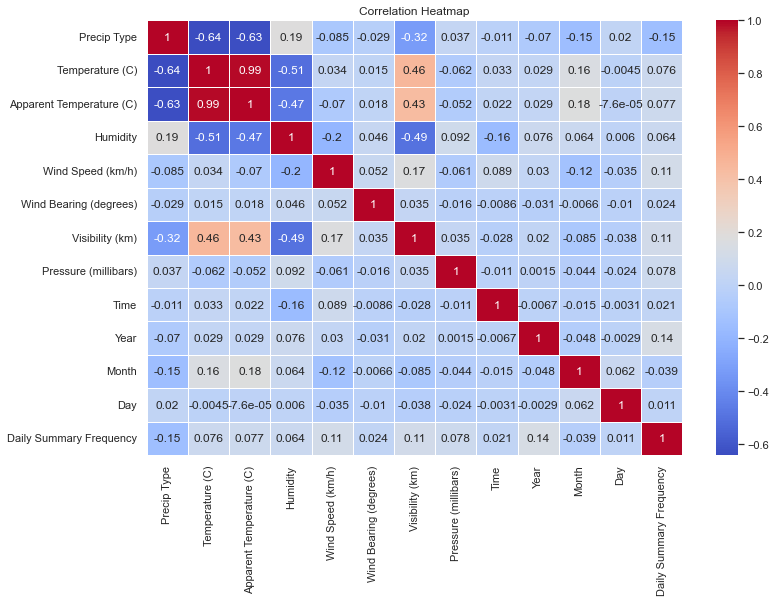

In [120]:
# Confirming multicollinearity using heatmap
sns.set(style="white")
plt.figure(figsize=(12,8))
sns.heatmap(input_df.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [121]:
# As Daily Summary Frequency has a negligible correlation with the other features and it is apparent that the final target is not going to be affected by this, removing it.
input_df.drop(['Daily Summary Frequency'], axis=1, inplace=True)

In [122]:
input_df.drop(['Temperature (C)'], axis=1, inplace=True)

* #### Checking Statistics Testing

In [123]:
# Ho : Average tem. of sample is same as Average humuduty of population
# H1 :  average tem. of sample is not same as average humidity of population
m1=data['Temperature (C)'].mean()
m1

7.6415558916780455

In [124]:
df1 = pd.DataFrame(data)

In [125]:
df2=df1.sample(31)

In [126]:
sample_t_test =data['Humidity']
sample_t_test
sample_t_test.mean()

0.827151167864062

In [127]:
import scipy.stats as stats
p = stats.ttest_1samp(sample_t_test, m1)[1]
if p < 0.05:    # alfa is equal to 0.05 i.e. 5%
    print("reject NULL")
else:
    print("accept NULL")

reject NULL


Average Tem. of sample is not same as Average Tem. of population

In [128]:
m11=data[data['Summary']=='Clear']['Temperature (C)']
m21=data[data['Summary']=='Foggy']['Temperature (C)']

In [129]:
t_statistic, p_value = stats.ttest_ind(m11,m21, equal_var=False)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 88.63304245251355
P-Value: 0.0


In [130]:
from s+cipy.stats import f_oneway

In [131]:
#Using Anova test if all summary having same wind speed
groups1 = [group['Wind Speed (km/h)'] for name, group in data.groupby('Summary')]
statistic, p_value = f_oneway(*groups1)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Summary have different Wind Speed (km/h).")
else:
    print("Fail to reject null hypothesis: Summary have similar Wind Speed (km/h).")

Reject null hypothesis: Summary have different Wind Speed (km/h).


In [132]:
#Implement one tail Z test to check if Apparent temp of overcast summary is higher than Apparent temp.of foggy summary.
m7=data[data['Summary']=='Overcast']['Temperature (C)']
m8=data[data['Summary']=='Foggy']['Temperature (C)']

In [133]:
mean_Foggy = np.mean(m7)
std_Foggy = np.std(m7, ddof=1)  

mean_Overcast = np.mean(m8)
std_Overcast = np.std(m8, ddof=1)

In [134]:
Null = 'The Temperature of Overcast Summary is less than or equal to the Temperature of Foggy Summary.'
Alternative = 'The Temperature of Overcast Summary is higher than  the Temperature of Foggy Summary'

In [135]:
z = (mean_Foggy - mean_Overcast) / np.sqrt((std_Foggy**2 / len(m7)) + (std_Overcast**2 / len(m8)))
critical_z = stats.norm.ppf(1 - alpha)
if z > critical_z:
    print("Reject the null hypothesis.",Alternative)
else:
    print("Accept the null hypothesis.",Null)

Reject the null hypothesis. The Temperature of Overcast Summary is higher than  the Temperature of Foggy Summary


* #### Train-Test Split

In [136]:
# Creating X input set
X = input_df.values
X

array([[0.000e+00, 1.442e+01, 5.800e-01, ..., 2.006e+03, 4.000e+00,
        1.000e+01],
       [0.000e+00, 1.426e+01, 5.900e-01, ..., 2.006e+03, 4.000e+00,
        1.000e+01],
       [0.000e+00, 1.377e+01, 6.000e-01, ..., 2.006e+03, 4.000e+00,
        1.100e+01],
       ...,
       [0.000e+00, 1.502e+01, 9.000e-01, ..., 2.016e+03, 9.000e+00,
        9.000e+00],
       [0.000e+00, 1.387e+01, 9.300e-01, ..., 2.016e+03, 9.000e+00,
        9.000e+00],
       [0.000e+00, 1.607e+01, 8.800e-01, ..., 2.016e+03, 9.000e+00,
        9.000e+00]])

In [137]:
# Splitting the data into training and test sets (80 - 20) 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

* #### Normalizing Input Features

In [138]:
# Apply scaling on the input_df DataFrame
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

###  Model Building

* #### Parametric Algorithm 1: Logistic Regression Classifier

In [139]:
def calculate_classification_metrics(y_true, y_pred, algorithm):
    """
    Return the classification Metrics
    
    y_true = actual values
    y_pred = predicted values
    y_pred_probability = probability values
    algorithm = algorithm name
    """
    accuracy = round(accuracy_score(y_true, y_pred), 3)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 3)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 3)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 3)
    print("Algorithm: ", algorithm)
    print()
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print()
    cm = confusion_matrix(y_true, y_pred)
    labels = ['Overcast', 'Clear','Foggy']
    plt.figure(figsize=(10, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    return accuracy, precision, recall, f1



In [140]:
# Hyperparameter tuning
parameters = {'solver': ['liblinear', 'saga'], 
              'multi_class':['ovr', 'multinomial'],
              'C':[0.001, 0.01, 10.0],
              'penalty': ['l1', 'l2']}
# Model Creation and Training
model_lr = LogisticRegression(n_jobs=-1)
models_lr = GridSearchCV(estimator=model_lr, param_grid=parameters, cv=4)
models_lr.fit(x_train, y_train)
best_parameters = models_lr.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions for train
best_model_lr = models_lr.best_estimator_
y_pred_lr = best_model_lr.predict(x_train)
# Predictions for test
y_pred_lr_new = best_model_lr.predict(x_test)


Best Hyperparameters: {'C': 10.0, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}



Testing Performance
Algorithm:  Logistic Regression

Accuracy: 0.805
Precision: 0.802
Recall: 0.805
F1 Score: 0.802



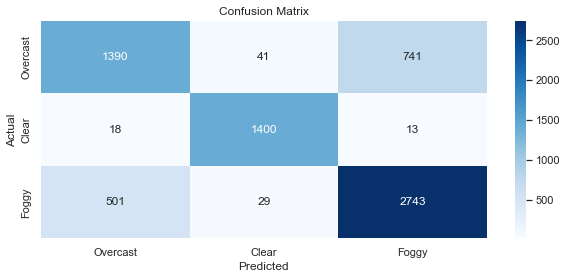

In [141]:
# Evaluation Metrics Calculation
print("Testing Performance")
accuracy_lr, precision_lr, recall_lr, f1_lr = calculate_classification_metrics(y_test, y_pred_lr_new, "Logistic Regression")

* #### Accuracy: Logistic Regression model gives 80.5% accuracy.

* #### Parametric Algorithm 2: Gaussian Naive Bayes Classifier

In [142]:
# Hyperparameter tuning
parameters = {'var_smoothing':[1e-9, 1e-8, 1e-10]}
# Model Creation and Training
model_nb = GaussianNB()
models_nb = GridSearchCV(estimator=model_nb, param_grid=parameters, cv=4)
models_nb.fit(x_train, y_train)
best_parameters = models_nb.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions on training data
best_model_nb = models_nb.best_estimator_
y_pred_nb = best_model_nb.predict(x_train)
# Predictions on test data
y_pred_nb_new = best_model_nb.predict(x_test)

Best Hyperparameters: {'var_smoothing': 1e-09}



Testing Performance
Algorithm:  Gaussian NB

Accuracy: 0.756
Precision: 0.763
Recall: 0.756
F1 Score: 0.741



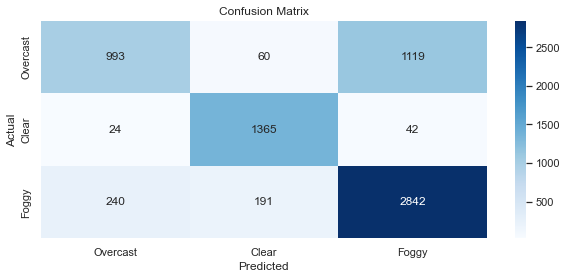

In [143]:
# Evaluation Metrics Calculation
print("Testing Performance")
accuracy_nb, precision_nb, recall_nb, f1_nb = calculate_classification_metrics(y_test, y_pred_nb_new, "Gaussian NB")

* #### Accuracy: Gaussian Naive Bayes Classifier model gives 75.6% accuracy.

* #### Non-Parametric Algorithm 1: Decision Tree Classifier

In [144]:
# Hyperparameter tuning
parameters = {'criterion':['gini', 'entropy', 'log_loss'], 
              'max_depth': [None, 5, 10],
              'min_samples_split': [None, 2, 5],
              'splitter':['best','random']}
# Model Creation and Training
model_dt = DecisionTreeClassifier()
models_dt = GridSearchCV(estimator=model_dt, param_grid=parameters, cv=4)
models_dt.fit(x_train, y_train)
best_parameters = models_dt.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions on train data
best_model_dt = models_dt.best_estimator_
y_pred_dt = best_model_dt.predict(x_train)
# Predictions on test data
y_pred_dt_new = best_model_dt.predict(x_test)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2, 'splitter': 'best'}



Testing Performance
Algorithm:  Decision Tree

Accuracy: 0.894
Precision: 0.894
Recall: 0.894
F1 Score: 0.894



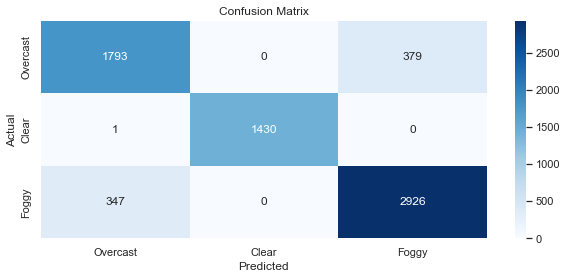

In [145]:
# Evaluation Metrics Calculation
print("Testing Performance")
accuracy_dt, precision_dt, recall_dt, f1_dt = calculate_classification_metrics(y_test, y_pred_dt_new, "Decision Tree")

* #### Accuracy:  Decision Tree Classifier model gives 89.3% accuracy

* #### Non-Parametric Algorithm 2: K Nearest Neighbours Classifier

In [146]:
# Hyperparameter tuning
parameters = {'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree','kd_tree','brute'],
            'p': [1,2]}
# Model Creation and Training
model_knn = KNeighborsClassifier(n_neighbors=5)
models_knn = GridSearchCV(estimator=model_knn, param_grid=parameters, cv=4)
models_knn.fit(x_train, y_train)
best_parameters = models_knn.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions on train data
best_model_knn = models_knn.best_estimator_
y_pred_knn = best_model_knn.predict(x_train)
# Predictions on test data
y_pred_knn_new = best_model_knn.predict(x_test)

Best Hyperparameters: {'algorithm': 'auto', 'p': 1, 'weights': 'distance'}



Testing Performance
Algorithm:  KNN

Accuracy: 0.898
Precision: 0.898
Recall: 0.898
F1 Score: 0.898



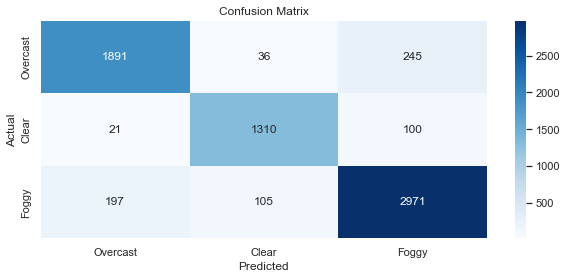

In [147]:
# Evaluation Metrics Calculation
print("Testing Performance")
accuracy_knn, precision_knn, recall_knn, f1_knn = calculate_classification_metrics(y_test, y_pred_knn_new, "KNN")

* #### Accuracy: K Nearest Neighbours Classifier model gives 89.8% accuracy

* #### Non-Parametric Algorithm 3: Random Forest Classifier

In [148]:
# Hyperparameter tuning
parameters = {'max_depth': [None, 5],
            'class_weight': [None, 'balanced'],
            'min_samples_split': [None, 2, 5]}
# Model Creation and Training
model_rf = RandomForestClassifier()
models_rf = GridSearchCV(estimator=model_rf, param_grid=parameters, cv=4)
models_rf.fit(x_train, y_train)
best_parameters = models_rf.best_params_
print("Best Hyperparameters:", best_parameters)
print()
# Predictions on train data
best_model_rf = models_rf.best_estimator_
y_pred_rf = best_model_rf.predict(x_train)
# Predictions on test data
y_pred_rf_new = best_model_rf.predict(x_test)

Best Hyperparameters: {'class_weight': None, 'max_depth': None, 'min_samples_split': 2}



Testing Performance
Algorithm:  Random Forest

Accuracy: 0.939
Precision: 0.939
Recall: 0.939
F1 Score: 0.938



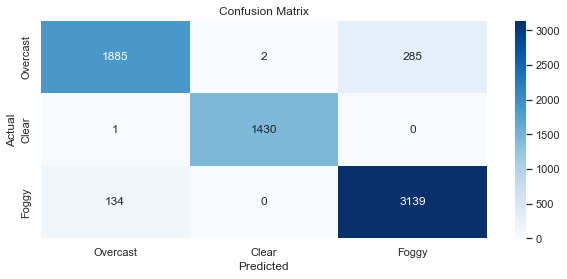

In [149]:
# Evaluation Metrics Calculation
print("Testing Performance")
accuracy_rf, precision_rf, recall_rf, f1_rf = calculate_classification_metrics(y_test, y_pred_rf_new, "Random Forest")

* #### Accuracy: Random Forest Classifier model gives 94.0% accuracy

In [150]:
# Results
print("Testing Performances for Machine Learning Algorithms")
result = pd.DataFrame({"Algorithms":['Logistic Regression', "Gaussian Naive Bayes", "Decision Tree", "KNN","Random Forest"],
                       "Accuracy":[accuracy_lr, accuracy_nb, accuracy_dt, accuracy_knn, accuracy_rf],
                       "Precision":[precision_lr, precision_nb, precision_dt, precision_knn, precision_rf],
                       "Recall":[recall_lr, recall_nb, recall_dt, recall_knn, recall_rf],
                       "F1 Score":[f1_lr, f1_nb, f1_dt, f1_knn, f1_rf]}).set_index('Algorithms')
result

Testing Performances for Machine Learning Algorithms


,Accuracy,Precision,Recall,F1 Score
Algorithms,,,,
Logistic Regression,0.805,0.802,0.805,0.802
Gaussian Naive Bayes,0.756,0.763,0.756,0.741
Decision Tree,0.894,0.894,0.894,0.894
KNN,0.898,0.898,0.898,0.898
Random Forest,0.939,0.939,0.939,0.938


# Therefore, Here we see that the highest Accuracy is 94.0% and the best algorithm model is Random Forest Classifier.

# We also observe that K Nearest Neighbours Classifier and Decision Tree Classifier gives good accuracy and its 89.8% and 89.3%.